# Genetic Toggle Switch
Gardner et al. Nature (1999) 'Construction of a genetic toggle switch in Escherichia coli'

## Setup the Environment

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:
import gillespy2

## Build the Genetic Toggle Switch Model

In [3]:
def build_toggle_switch(parameter_values=None):
    # Initialize model
    model = gillespy2.Model(name="toggle_switch")
    
    # Define Species
    U = gillespy2.Species(name='U', initial_value=10)
    V = gillespy2.Species(name='V', initial_value=10)
    
    # Add Species to Model
    model.add_species([U, V])

    # Define Parameters
    alpha1 = gillespy2.Parameter(name='alpha1', expression=1)
    alpha2 = gillespy2.Parameter(name='alpha2', expression=1)
    beta = gillespy2.Parameter(name='beta', expression="2.0")
    gamma = gillespy2.Parameter(name='gamma', expression="2.0")
    mu = gillespy2.Parameter(name='mu', expression=1.0)
    
    # Add Parameters to Model
    model.add_parameter([alpha1, alpha2, beta, gamma, mu])

    # Define Reactions
    cu = gillespy2.Reaction(
        name="r1", reactants={}, products={U: 1}, propensity_function="alpha1/(1+pow(V,beta))"
    )
    cv = gillespy2.Reaction(
        name="r2", reactants={}, products={V: 1}, propensity_function="alpha2/(1+pow(U,gamma))"
    )
    du = gillespy2.Reaction(name="r3", reactants={U: 1}, products={}, rate=mu)
    dv = gillespy2.Reaction(name="r4", reactants={V: 1}, products={}, rate=mu)
    
    # Add Reactions to Model
    model.add_reaction([cu, cv, du, dv])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Add Timespan to Model
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_toggle_switch()

## Run the Simulations

In [5]:
results = model.run()

### Deterministic Results

In [6]:
dresults = model.run(algorithm="ODE")

## Visualization

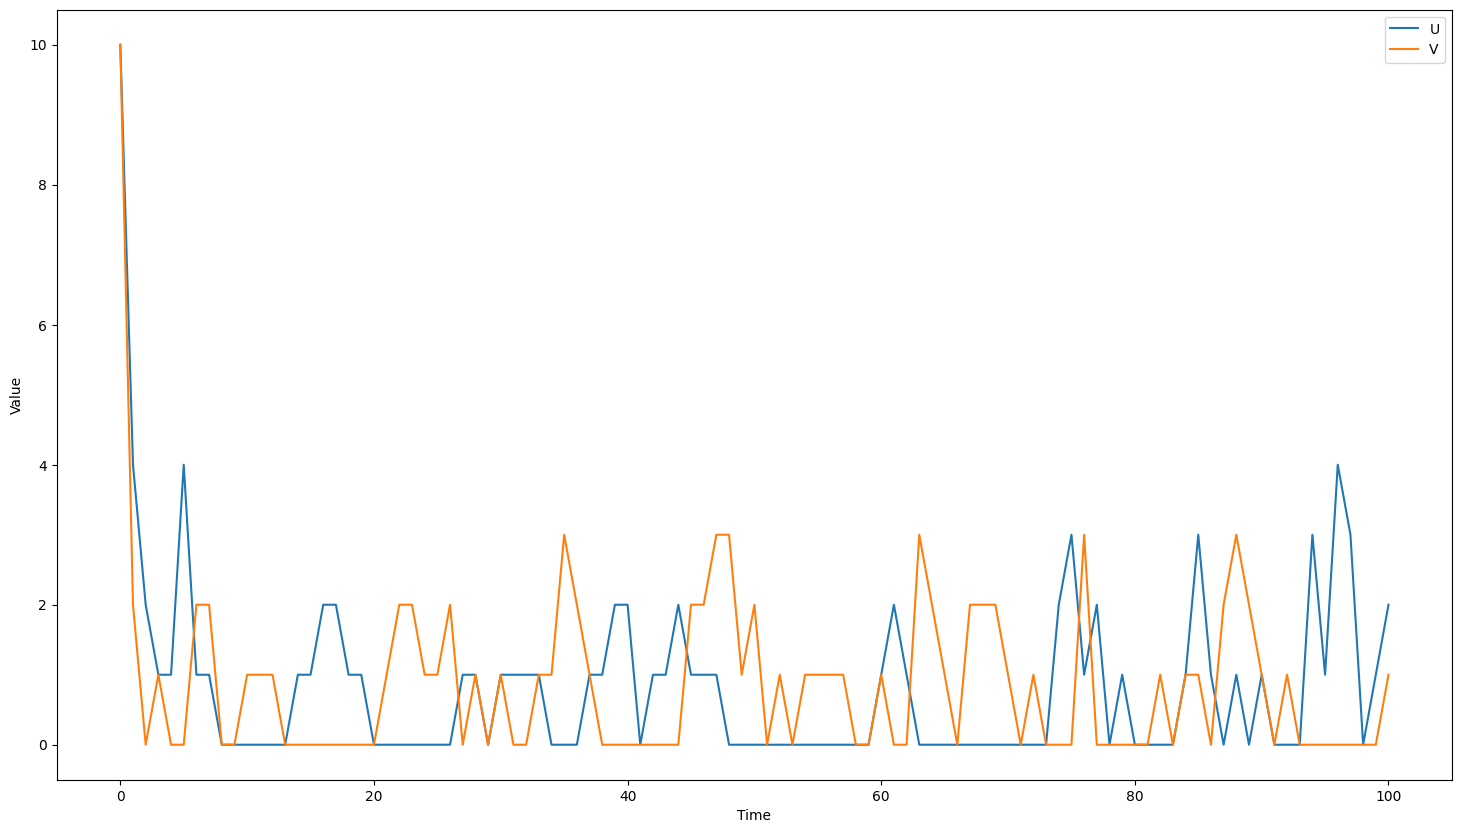

In [7]:
results.plot()

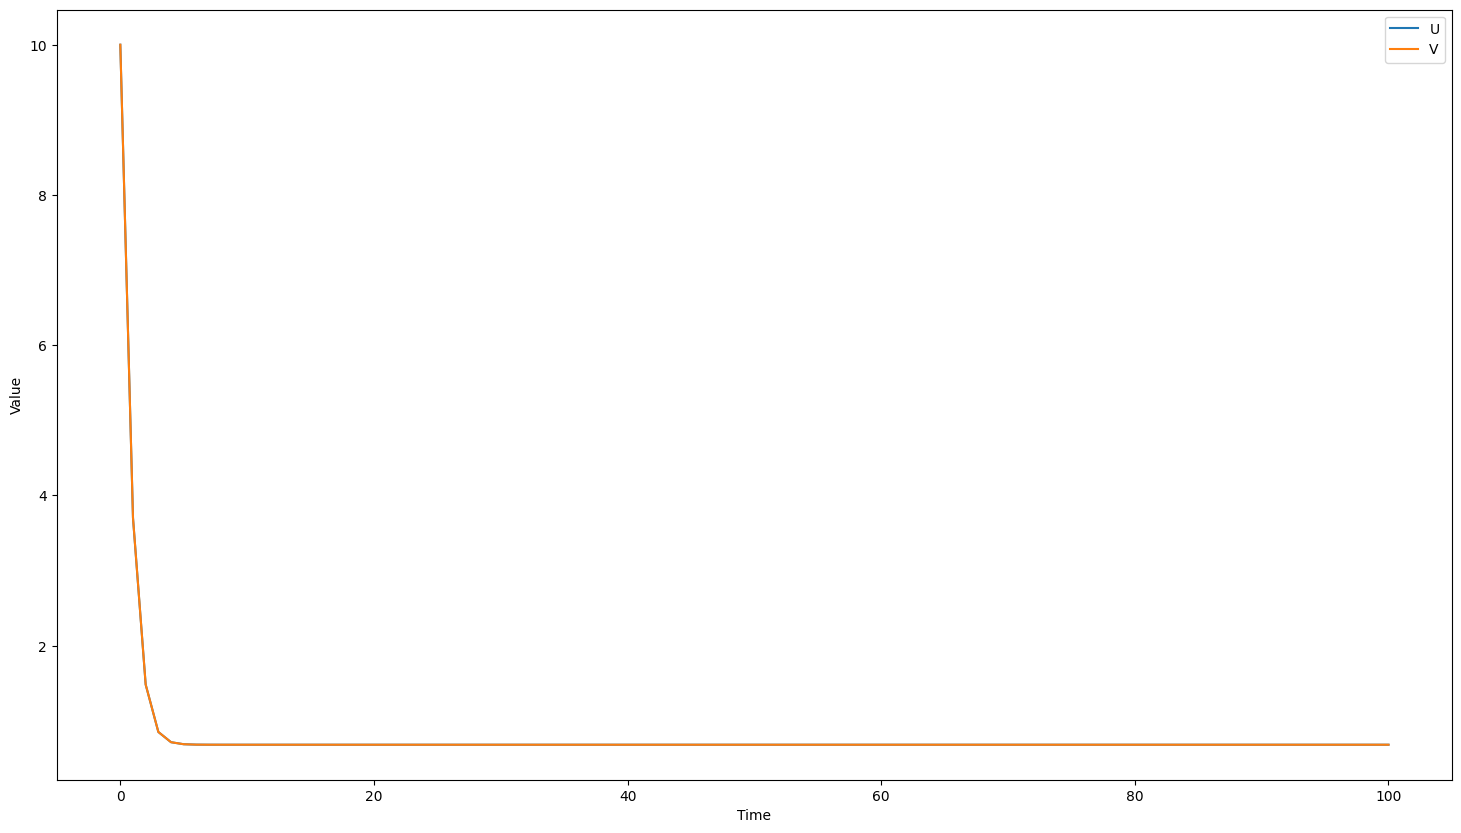

In [8]:
dresults.plot()